In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
def convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2):

    if p1 == 'e':
        p1_vals = p1_vals**2
        fid_p1 = fid_p1**2
        p1_lbl = 'e^2'
    else:
        p2_vals = p2_vals**2
        fid_p2 = fid_p2**2
        p2_lbl = 'e^2'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

def convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2):

    if p1 == 'q':
        p1_vals = p1_vals/(1+p1_vals)**2
        fid_p1 = fid_p1/(1+fid_p1)**2
        p1_lbl = 'sym mass ratio'
    else:
        p2_vals = p2_vals/(1+p2_vals)**2
        fid_p2 = fid_p2/(1+fid_p2)**2
        p2_lbl = 'sym mass ratio'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

def convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, fid_q):

    if p1 == 'chi1':
        if p2 == 'q':
            q = p2_vals
        else:
            q = fid_q
        p1_vals = p1_vals/(1+1/q)
        fid_p1 = fid_p1/(1+1/fid_q)
        p1_lbl = 'chi_eff'
    else:
        if p1 == 'q':
            q = p1_vals
        else:
            q = fid_q
        p2_vals = p2_vals/(1+1/q)
        fid_p2 = fid_p2/(1+1/fid_q)
        p2_lbl = 'chi_eff'

    return p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2

# Base parameters

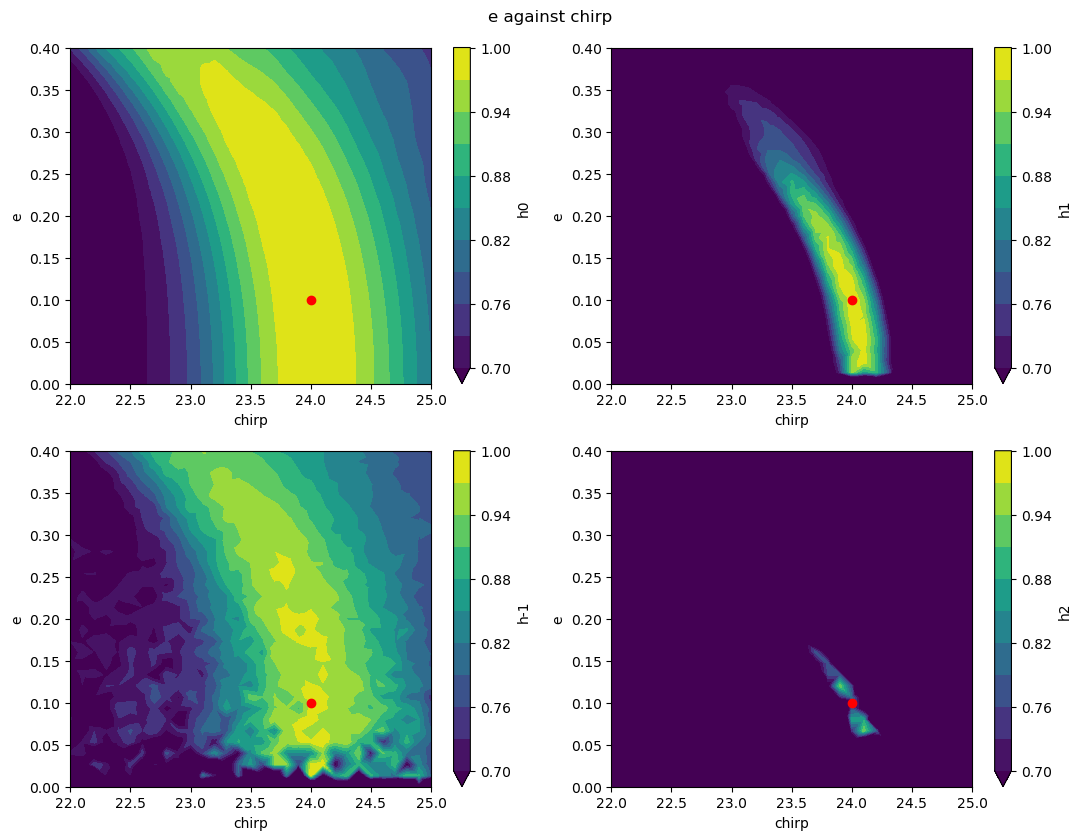

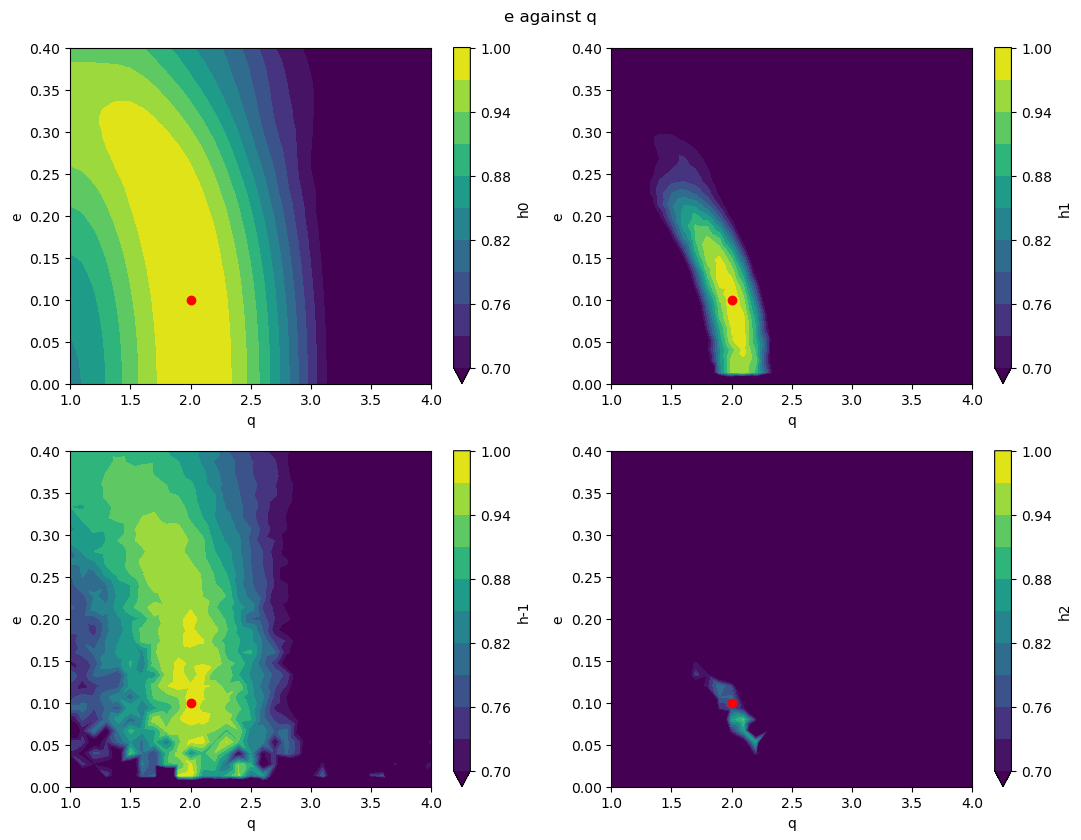

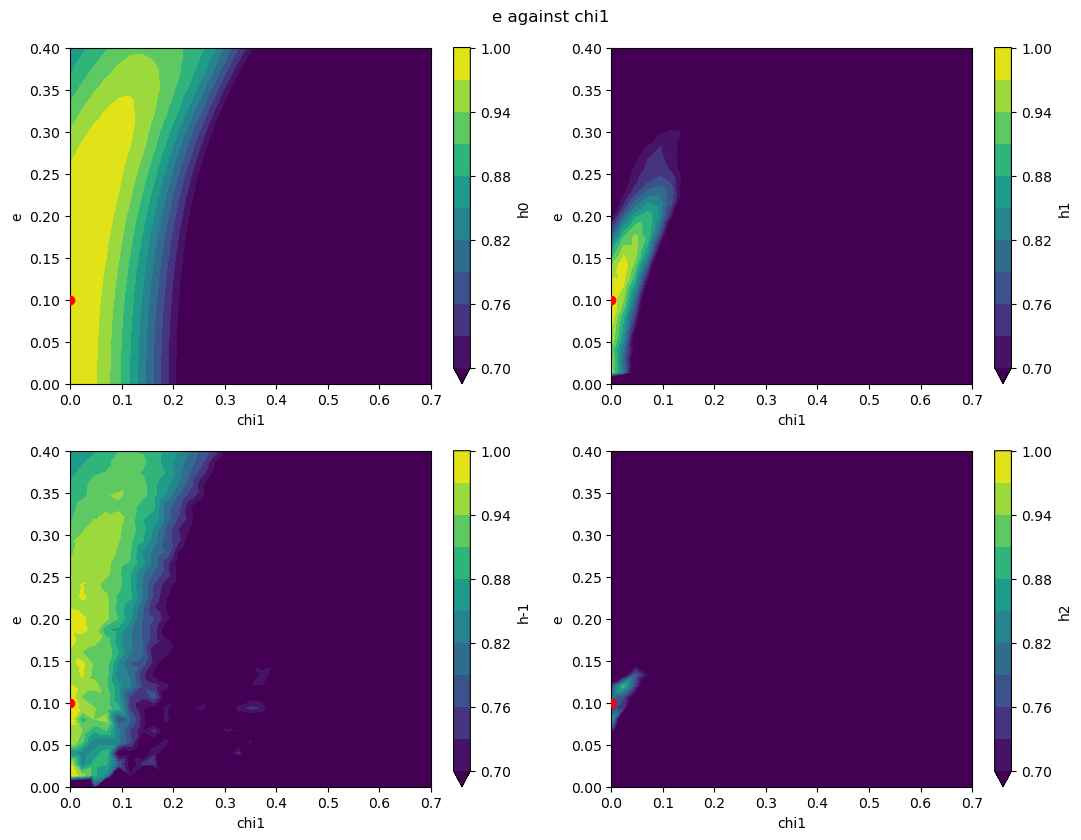

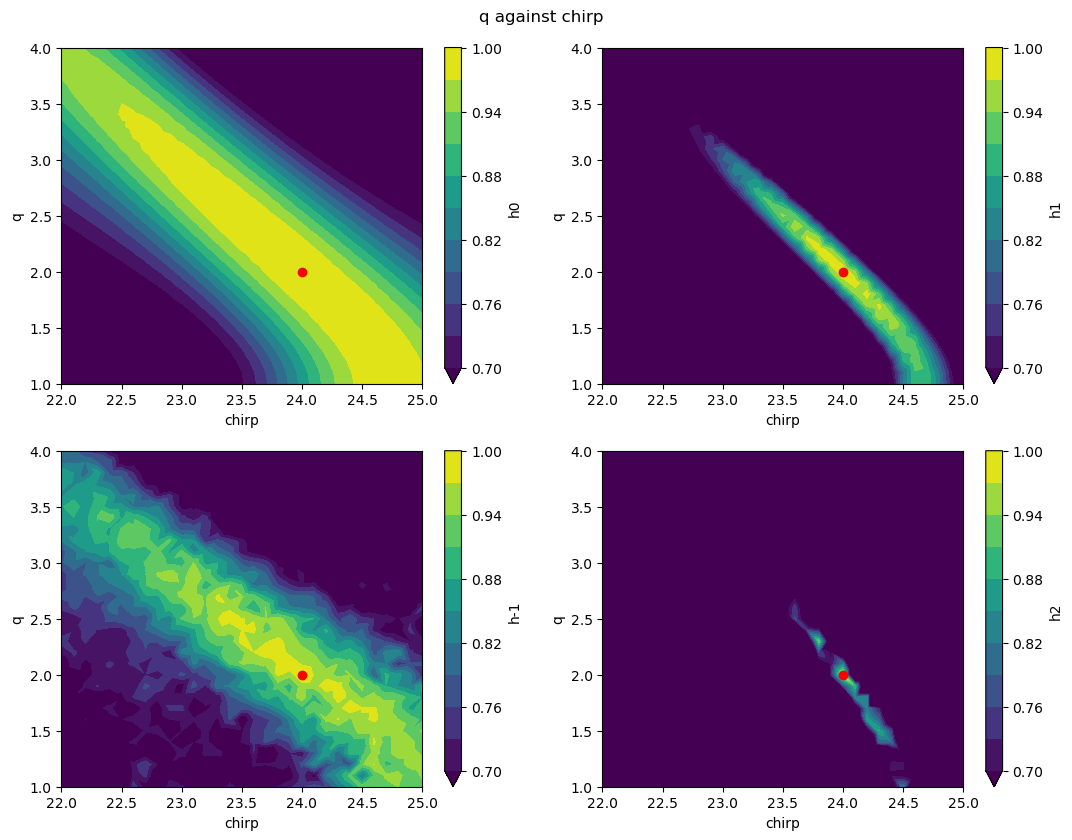

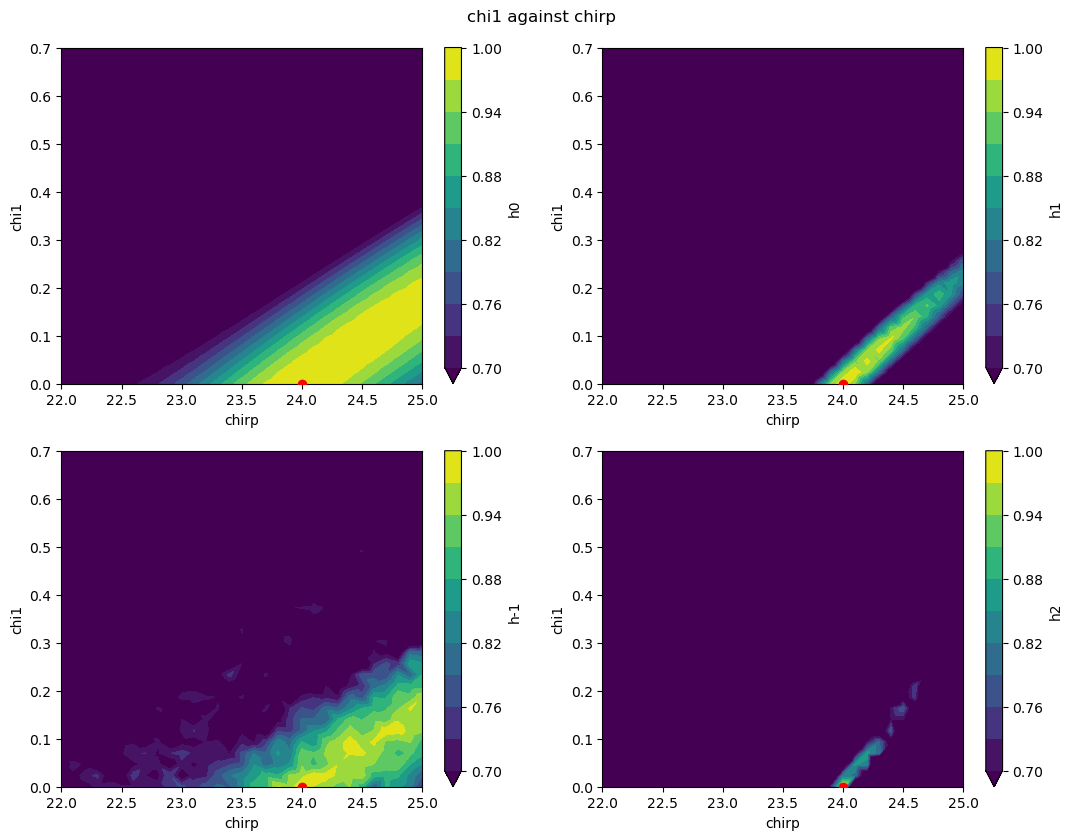

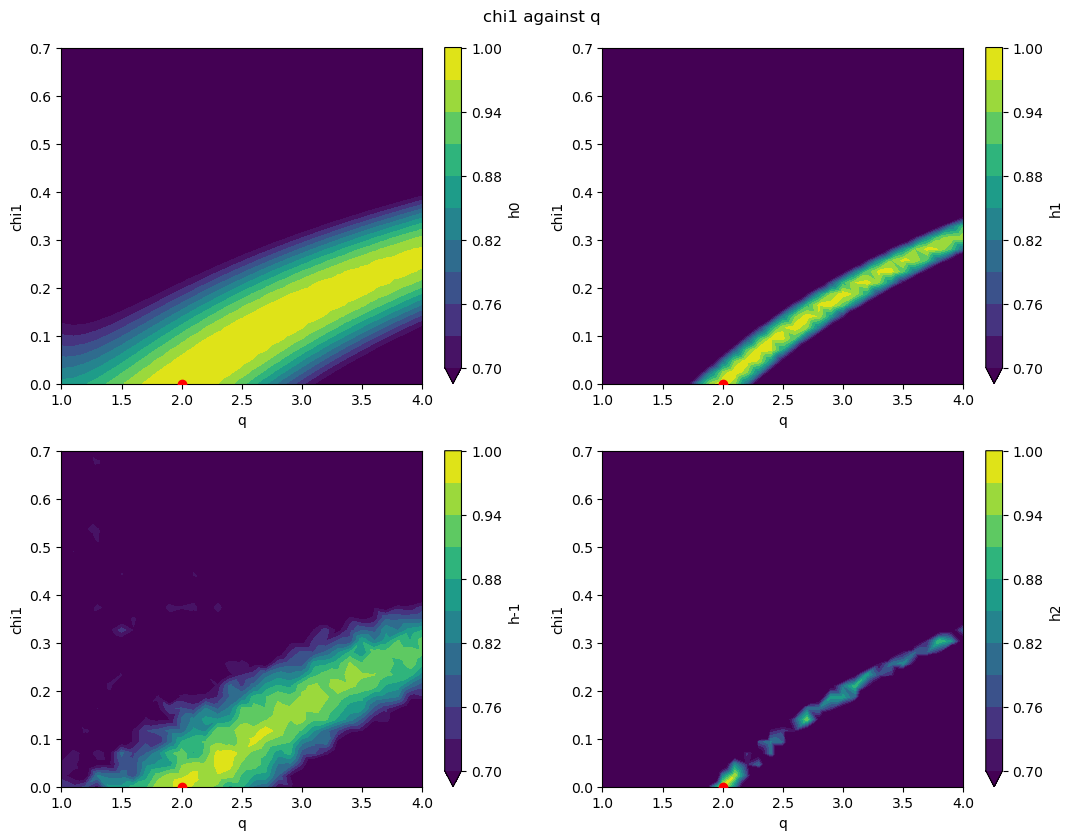

In [3]:
# Parameter conversions
use_e2 = False
use_sym_mass_ratio = False
use_chi_eff = False

# Load data
with open(os.path.join('six_slices_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Loop over each slice
keys = ['h0', 'h1', 'h-1', 'h2']
flip_xy = [True, True, True, False, False, False]
slice_keys = [key for key in data.keys() if ',' in key]
for i, slice_key in enumerate(slice_keys):

    # Unpack parameters for x and y axes
    slice_params = slice_key.split(',')
    if flip_xy[i]:
        slice_params.reverse()
    p1, p2 = slice_params
    p1_vals, p2_vals = np.meshgrid(data['input_params'][f'{p1}_vals'], data['input_params'][f'{p2}_vals'])
    p1_vals, p2_vals = p1_vals.flatten(), p2_vals.flatten()
    p1_lbl, p2_lbl = p1, p2
    fid_p1, fid_p2 = data['input_params'][f'fid_{p1}'], data['input_params'][f'fid_{p2}']

    # Parameter conversions
    if use_e2 and 'e' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_sym_mass_ratio and 'q' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_chi_eff and 'chi1' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, data['input_params']['fid_q'])

    # Loop over each subplot
    plt.figure(figsize=(6.4*2,4.8*2))
    for j in range(4):
        key = keys[j]
        if flip_xy[i]:
            contour_data = data[slice_key][key].flatten()
        else:
            contour_data = np.array(data[slice_key][key]).T.flatten()

        # Plot grid
        plt.subplot(2, 2, j+1)
        plt.tricontourf(p1_vals, p2_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
        plt.colorbar(label=key)
        plt.scatter(fid_p1, fid_p2, c='r', zorder=5)
        plt.xlabel(p1_lbl)
        plt.ylabel(p2_lbl)

    # Show each slice
    plt.suptitle(f'{p2_lbl} against {p1_lbl}', y=0.92)
    plt.show()

# Converted parameters

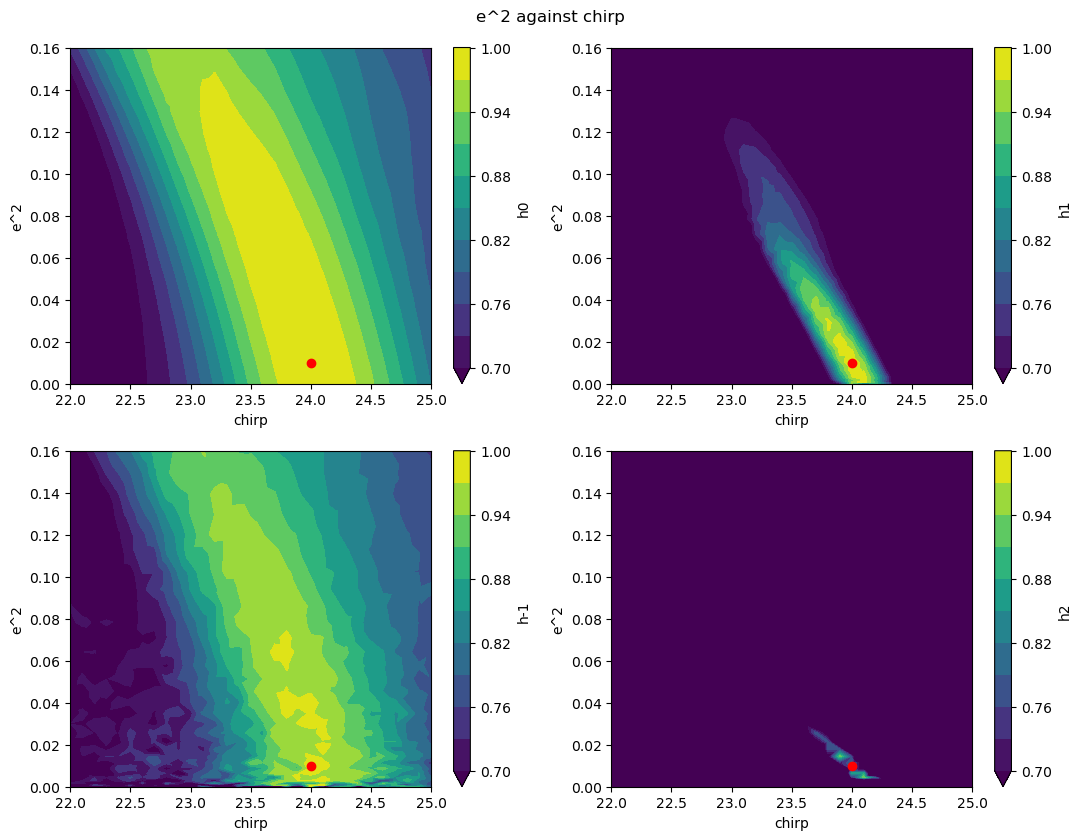

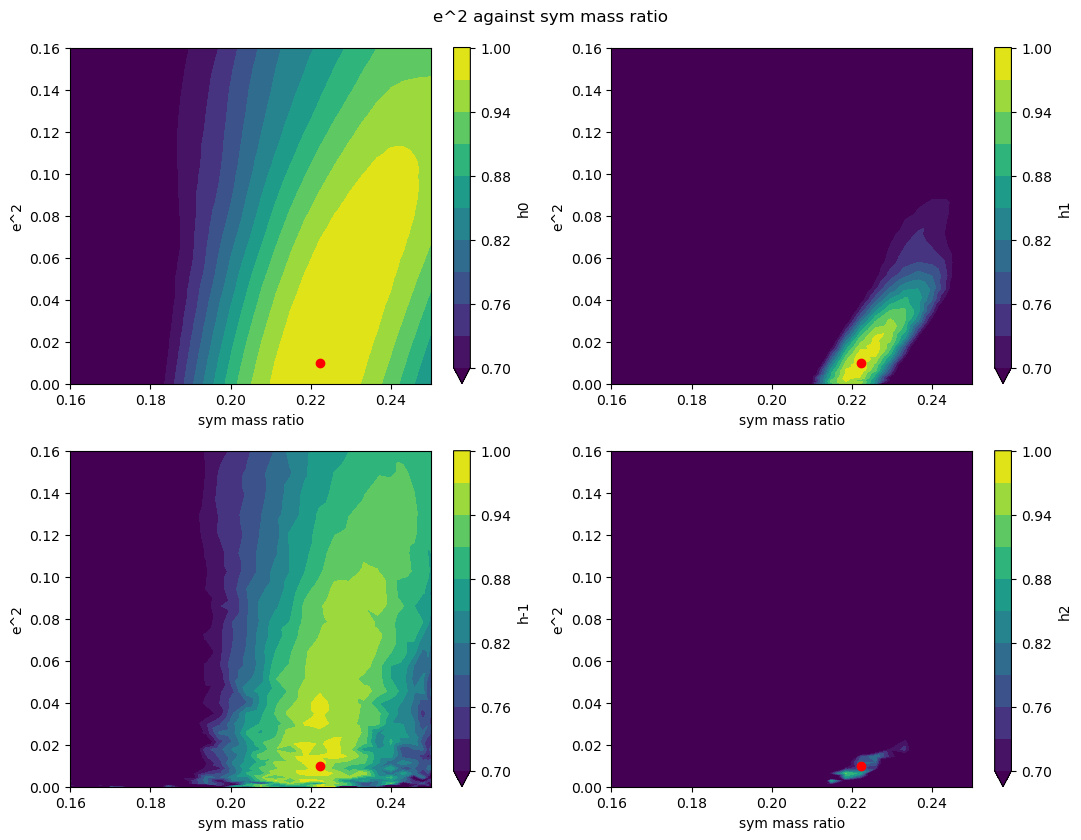

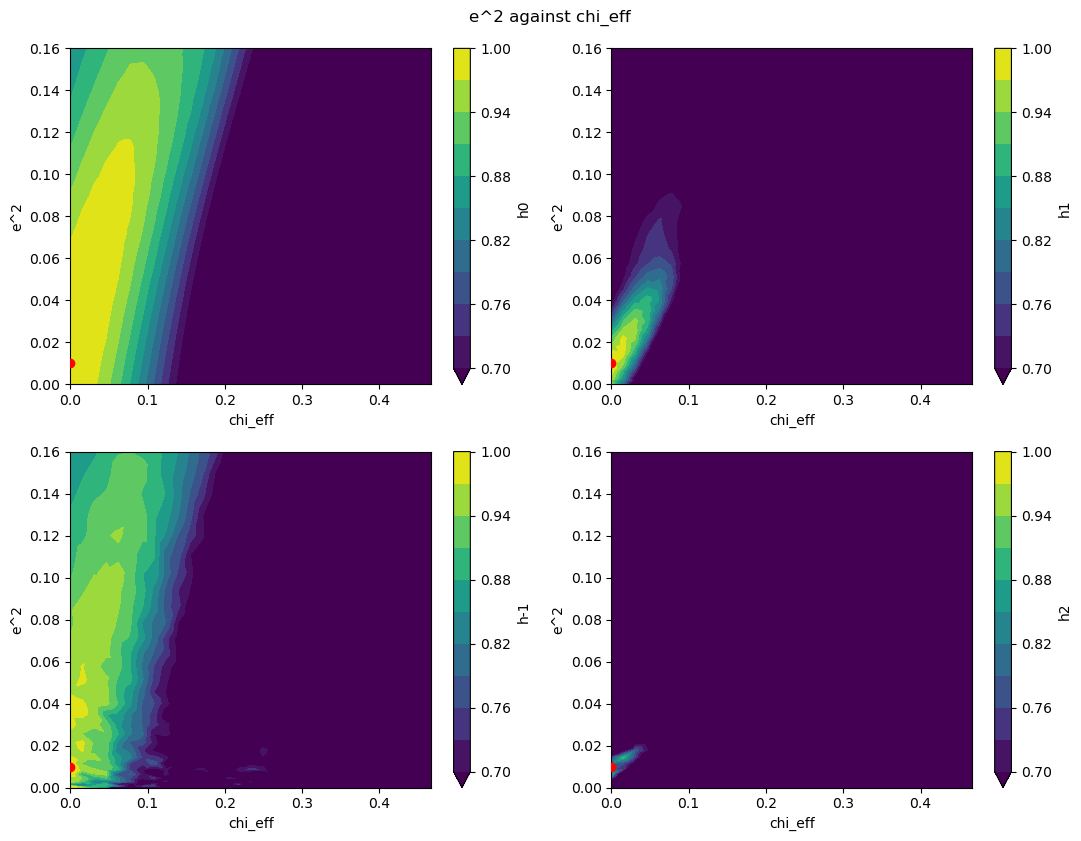

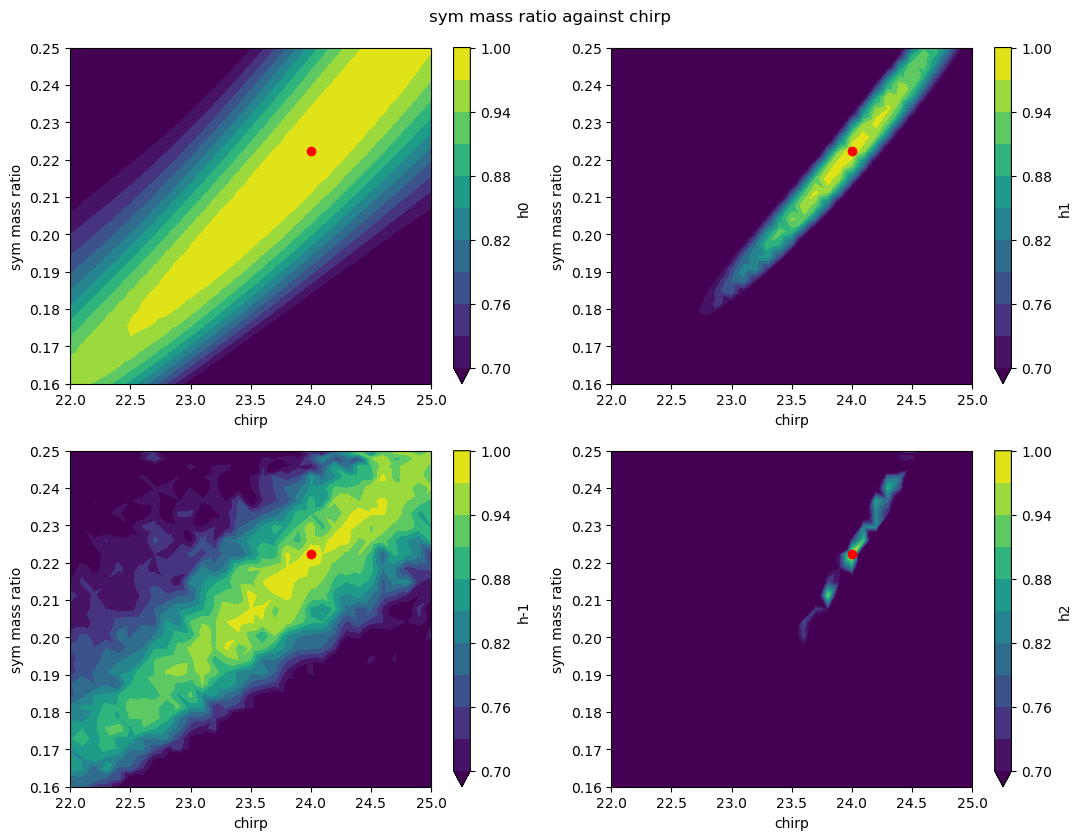

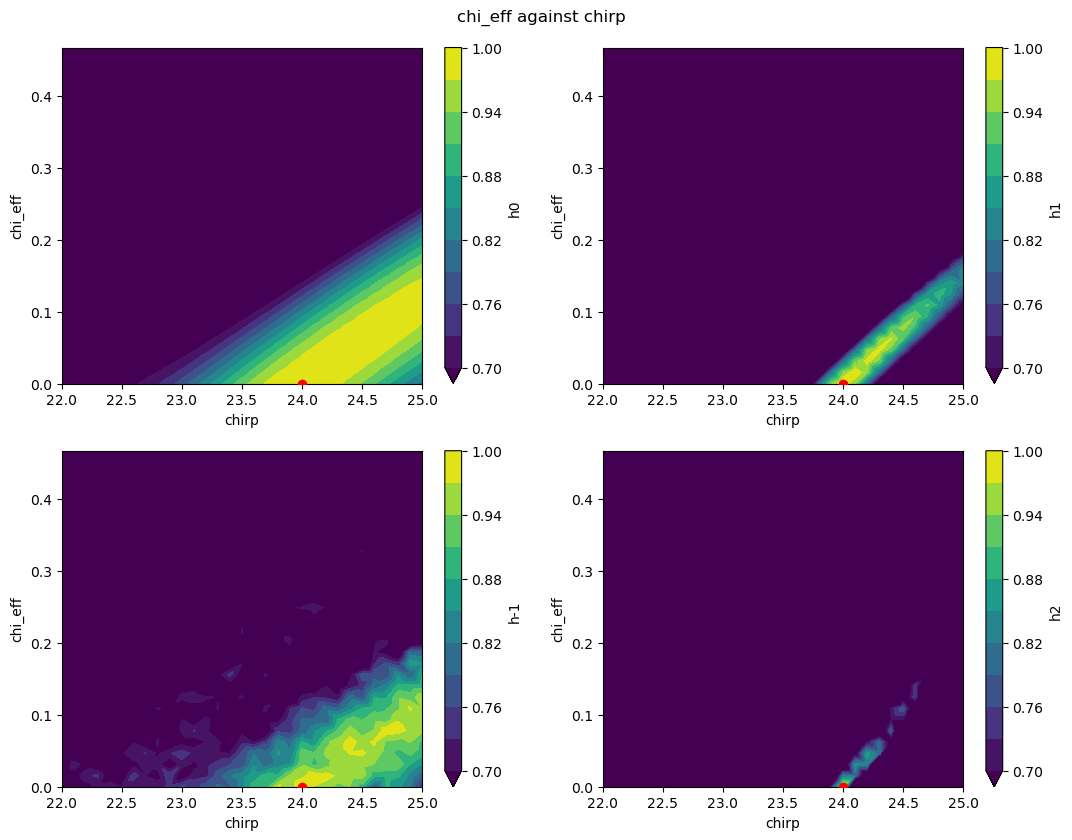

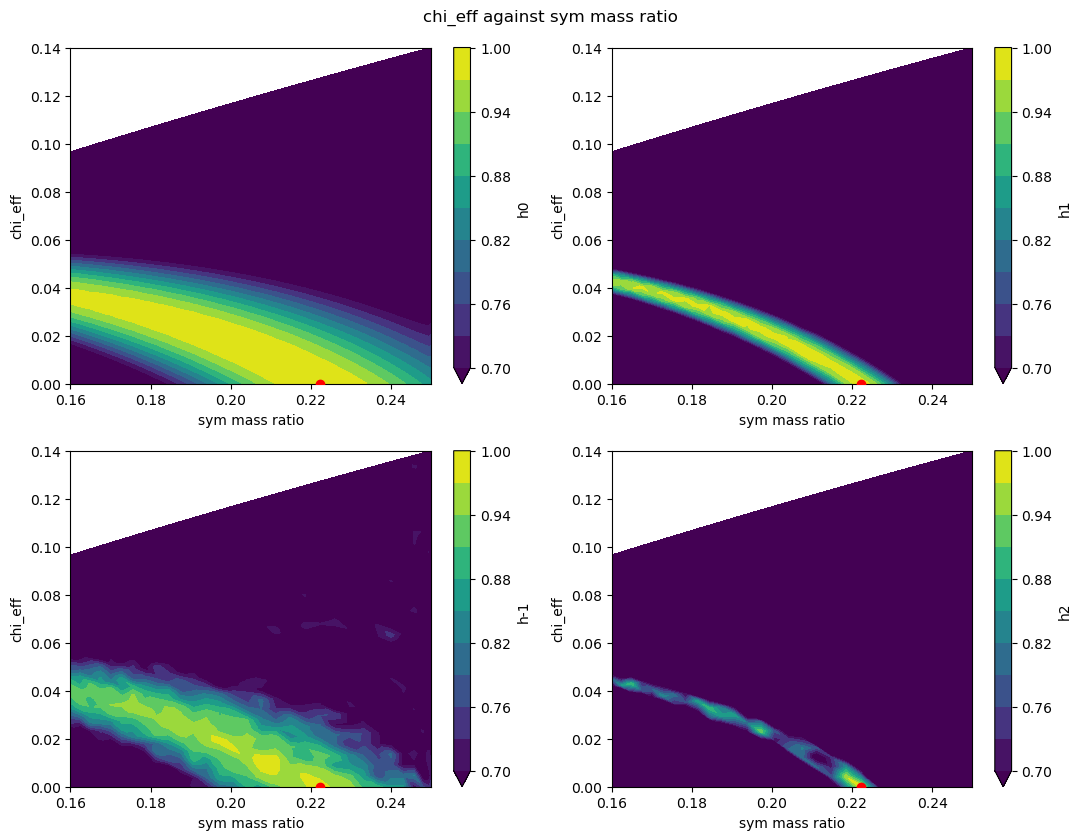

In [4]:
# Parameter conversions
use_e2 = True
use_sym_mass_ratio = True
use_chi_eff = True

# Load data
with open(os.path.join('six_slices_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Loop over each slice
keys = ['h0', 'h1', 'h-1', 'h2']
flip_xy = [True, True, True, False, False, False]
slice_keys = [key for key in data.keys() if ',' in key]
for i, slice_key in enumerate(slice_keys):

    # Unpack parameters for x and y axes
    slice_params = slice_key.split(',')
    if flip_xy[i]:
        slice_params.reverse()
    p1, p2 = slice_params
    p1_vals, p2_vals = np.meshgrid(data['input_params'][f'{p1}_vals'], data['input_params'][f'{p2}_vals'])
    p1_vals, p2_vals = p1_vals.flatten(), p2_vals.flatten()
    p1_lbl, p2_lbl = p1, p2
    fid_p1, fid_p2 = data['input_params'][f'fid_{p1}'], data['input_params'][f'fid_{p2}']

    # Parameter conversions
    if use_e2 and 'e' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_e2(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_sym_mass_ratio and 'q' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_sym_mass_ratio(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2)
    if use_chi_eff and 'chi1' in slice_key:
        p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_chi_eff(p1, p2, p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2, data['input_params']['fid_q'])

    # Loop over each subplot
    plt.figure(figsize=(6.4*2,4.8*2))
    for j in range(4):
        key = keys[j]
        if flip_xy[i]:
            contour_data = data[slice_key][key].flatten()
        else:
            contour_data = np.array(data[slice_key][key]).T.flatten()

        # Plot grid
        plt.subplot(2, 2, j+1)
        plt.tricontourf(p1_vals, p2_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
        plt.colorbar(label=key)
        plt.scatter(fid_p1, fid_p2, c='r', zorder=5)
        plt.xlabel(p1_lbl)
        plt.ylabel(p2_lbl)

    # Show each slice
    plt.suptitle(f'{p2_lbl} against {p1_lbl}', y=0.92)
    plt.show()

# Finding eigendirections of eta-chirp manually

Let's disregard spin for now and try and find the line of degeneracy in symmetric mass ratio (eta) against chirp space. We can also find the line perpendicular to this. These are the eigendirections in this space. We can then make grids of match of eccentricity against each of these eigendirections.

Parallel to the degeneracy the waveform length should stay roughly constant. We would therefore expect that when we change eccentricity we should move along the perpendicular eigendirection in eta-chirp space to stay at a constant length.

First let's just find the directions manually by eye.

Parallel gradient is 0.035, perpendicular gradient is -0.04571428571428571


(0.13, 0.25)

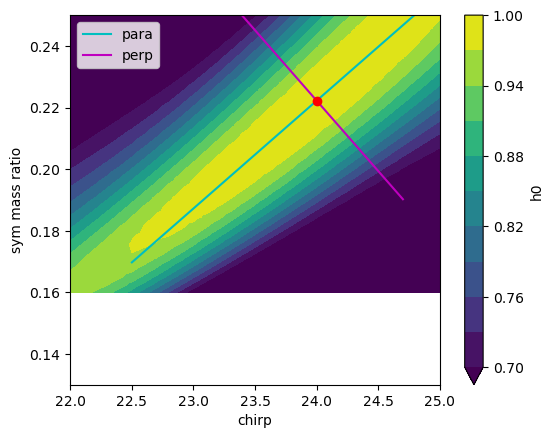

In [39]:
# Load data
with open(os.path.join('six_slices_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Get useful parts of data
p1_vals, p2_vals = np.meshgrid(data['input_params']['chirp_vals'], data['input_params']['q_vals'])
p1_vals, p2_vals = p1_vals.flatten(), p2_vals.flatten()
fid_p1, fid_p2 = data['input_params']['fid_chirp'], data['input_params']['fid_q']
p1_lbl, p2_lbl, p1_vals, p2_vals, fid_p1, fid_p2 = convert_sym_mass_ratio('chirp', 'q', 'chirp', 'q', p1_vals, p2_vals, fid_p1, fid_p2)
contour_data = np.array(data['chirp,q']['h0']).T.flatten()

# Plot grid
plt.tricontourf(p1_vals, p2_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
plt.gca().set_aspect(3/0.12)
plt.colorbar(label='h0')
plt.scatter(fid_p1, fid_p2, c='r', zorder=5)
plt.xlabel(p1_lbl)
plt.ylabel(p2_lbl)
ylims = plt.gca().get_ylim()

# Plot manual eigendirections
para_gradient = 0.035
perp_gradient = -1/(625*para_gradient)
print(f'Parallel gradient is {para_gradient}, perpendicular gradient is {perp_gradient}')
para_x_vals = np.linspace(22.5, 24.793650793650794, 31)
perp_x_vals = np.linspace(23.39236111111111, 24.7, 31)
para_y_vals = fid_p2 + (para_x_vals-fid_p1)*para_gradient
perp_y_vals = fid_p2 + (perp_x_vals-fid_p1)*perp_gradient
plt.plot(para_x_vals, para_y_vals, c='c', label='para')
plt.plot(perp_x_vals, perp_y_vals, c='m', label='perp')
plt.legend()
plt.ylim(0.13,0.25)

Finding perpendicular direction here is not trivial - differing parameters/units means we cannot simply take negative reciprocal of the gradient. Instead I 'normalised' by the 'uncertainty' by changing the ylimits such that the distance from the fiducial value to the edge of the 97% yellow region is approximately equal in both the x and y directions. The perpendicular direction is then (very roughly!) correct.

# Plotting slices through manual eigendirections

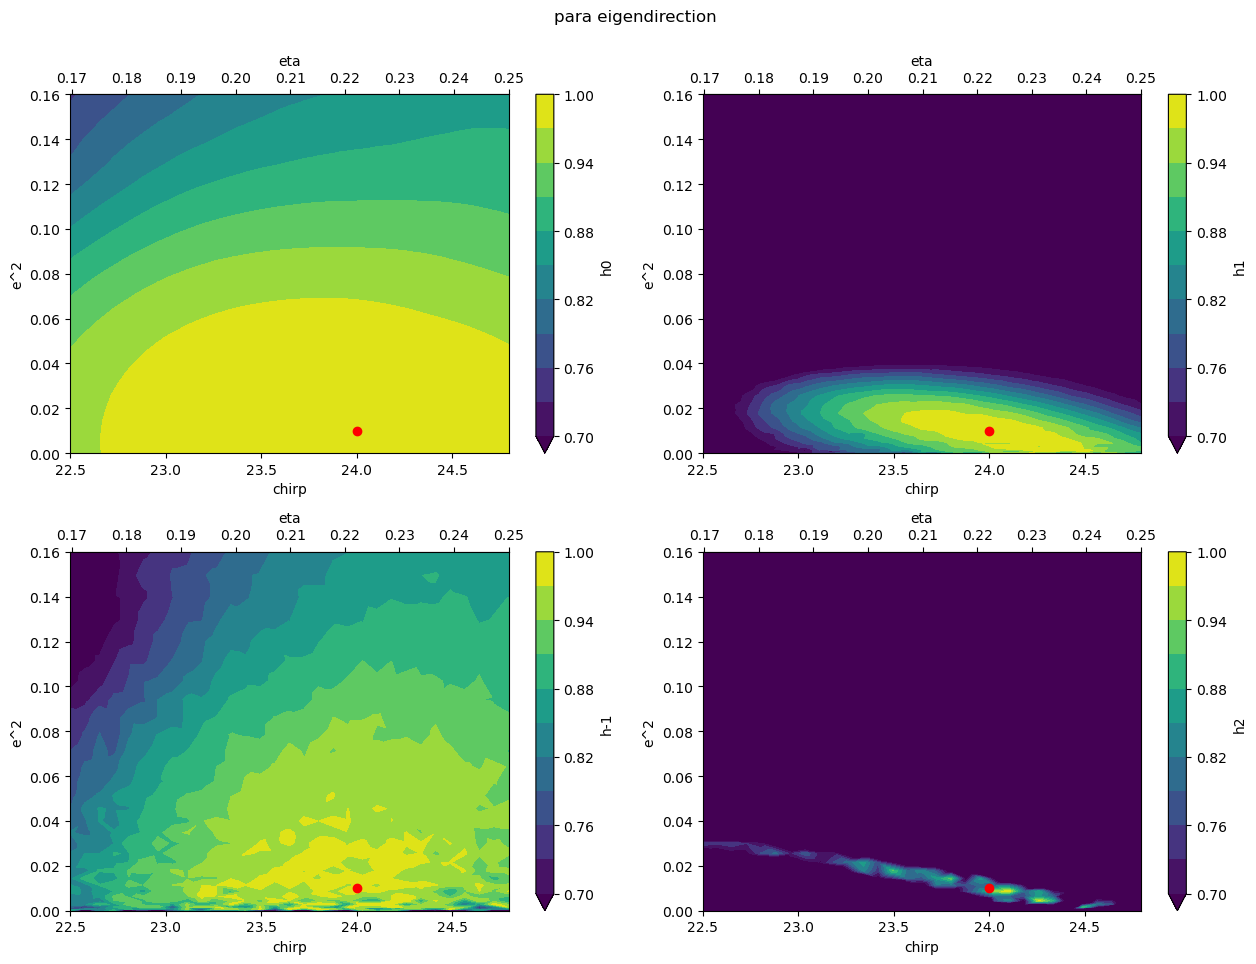

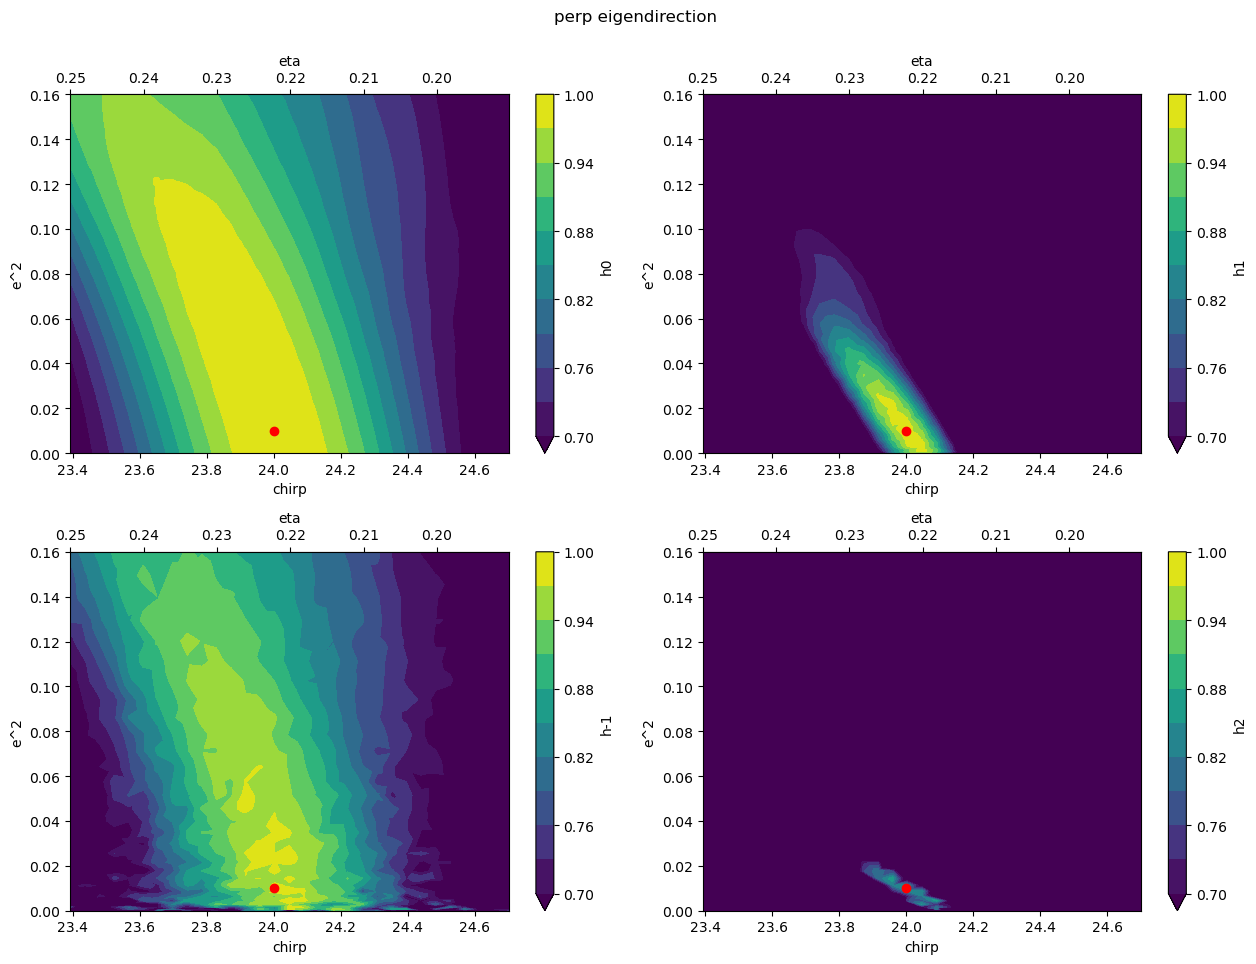

In [14]:
# Load data
with open(os.path.join('para_perp_slice_data', 'dataslot_0', 'all_matches'), 'rb') as fp:
    data = pickle.load(fp)

# Loop over each slice
keys = ['h0', 'h1', 'h-1', 'h2']
slice_keys = [key for key in data.keys() if key != 'input_params']
for i, slice_key in enumerate(slice_keys):

    # Unpack parameters for x and y axes
    chirp_vals, e_vals = np.meshgrid(data['input_params']['chirp_vals_dict'][slice_key], data['input_params']['e_vals']**2)
    chirp_vals, e_vals = chirp_vals.flatten(), e_vals.flatten()
    fid_chirp, fid_e, fid_q = data['input_params']['fid_chirp'], data['input_params']['fid_e']**2, data['input_params']['fid_q']

    # Loop over each subplot
    plt.figure(figsize=(6.4*2,4.8*2))
    for j in range(4):
        key = keys[j]
        contour_data = data[slice_key][key].flatten()

        # Plot grid
        plt.subplot(2, 2, j+1)
        plt.tricontourf(chirp_vals, e_vals, contour_data, np.linspace(0.7, 1, 11), vmax=1, vmin=0.7, extend='min')
        plt.colorbar(label=key)
        plt.scatter(fid_chirp, fid_e, c='r', zorder=5)
        plt.xlabel('chirp')
        plt.ylabel('e^2')

        # Second x axis for eta
        chirp2eta_ax = lambda x: fid_q/(1+fid_q)**2 + (x - fid_chirp)*data['input_params'][f'{slice_key}_gradient']
        eta2chirp_ax = lambda x: x/data['input_params'][f'{slice_key}_gradient'] + fid_chirp - fid_q/(1+fid_q)**2/data['input_params'][f'{slice_key}_gradient']
        secx = plt.gca().secondary_xaxis('top', functions=(chirp2eta_ax, eta2chirp_ax))
        secx.set_xlabel('eta')

    # Show each slice
    plt.suptitle(f'{slice_key} eigendirection', y=1)
    plt.tight_layout()
    plt.show()

Looks as expected. For the line parallel to the eta-chirp degeneracy the waveform does not change length, and so the match against eccentricity looks very similar for all places along line.

For the perpendicular eigendirection however the waveform is changing by the most possible and so the degeneracy of eccentricity against this line should be as steep as possible (and it is certainly steeper than for example the eccentricity vs only chirp mass slice). The degeneracy curves a little at higher eccentricity when plotting against eccentricity, but appears almost perfectly straight when plotting eccentricity squared.

# Finding eigendirections of eta-chirp with simple-pe

To measure the eigendirections more precisely/scientifically, we can use simple-pe.

In [2]:
from pycbc import psd
from simple_pe.param_est import find_metric_and_eigendirections
plt.rcParams['text.usetex'] = False
import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)

/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


lal.MSUN_SI != Msun
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new


/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


This has two main differences between the match grid above: firstly we are looking at the entire waveform here rather than each harmonic individually. Secondly, the match is taken with a lower frequency of 10Hz instead of 20Hz. We should therefore not compare the exact direction of the degeneracy we find with the example above.

In [3]:
# Defines PSD settings
ifos = ['H1']
psds = {'H1': 'aLIGOZeroDetHighPower',
        'f_low': 10,
        'f_high': 8192,
        'length': 32
        }
snr = 18
psds['delta_f'] = 1. / psds['length']
approximant = 'TEOBResumS-Dali'

# Calculates PSD
pycbc_psd = {}
for ifo in ifos:
    pycbc_psd[ifo] = psd.analytical.from_string(psds[ifo], psds['length'] * psds['f_high'] + 1, psds['delta_f'],
                                                psds['f_low'])
pycbc_psd['harm'] = 1. / sum([1. / pycbc_psd[ifo] for ifo in ifos])

# Uses simple-pe to calculate approx. of posterior dist. using metric, eigendirections
pars = {'chirp_mass':24, 'symmetric_mass_ratio':2/9, 'eccentricity': 0.1, 'spin_1z': 0, 'spin_2z': 0, 'f_ref':10}
par_dirs = ['chirp_mass', 'symmetric_mass_ratio']

g_chirp_eta = find_metric_and_eigendirections(pars, par_dirs, snr=snr, f_low=psds['f_low'], psd=pycbc_psd['harm'], approximant=approximant)

/home/ben.patterson/.conda/envs/igwn_eccentric/lib/python3.10/site-packages/pycbc/types/array.py:390: RuntimeWarning: divide by zero encountered in divide
  return self._data.__rtruediv__(other)
Calculating the metric | iteration 3 < 20 | error 0.00028 > 0.00036: 


In the current simple-pe version, the eigenvectors in g_chirp_eta.evec are actually the eigenvectors of metric from the penultimate iteration. We will therefore call g_chirp_eta.calculate_evecs() to update them to the final metric now.

In [4]:
g_chirp_eta.calculate_evecs()

Now we can generate the 90% confidence ellipse, as well as a grid of matches.

In [5]:
# Calculates 90% ellipse
chirp_eta_ellipse = g_chirp_eta.generate_ellipse()

# Calculates samples and match/pdf at each
chirp_eta_mat = g_chirp_eta.generate_match_grid(npts=11, scale=1.3)
chirp_eta_p = np.exp(-snr**2/2 * (1 - chirp_eta_mat['match']))

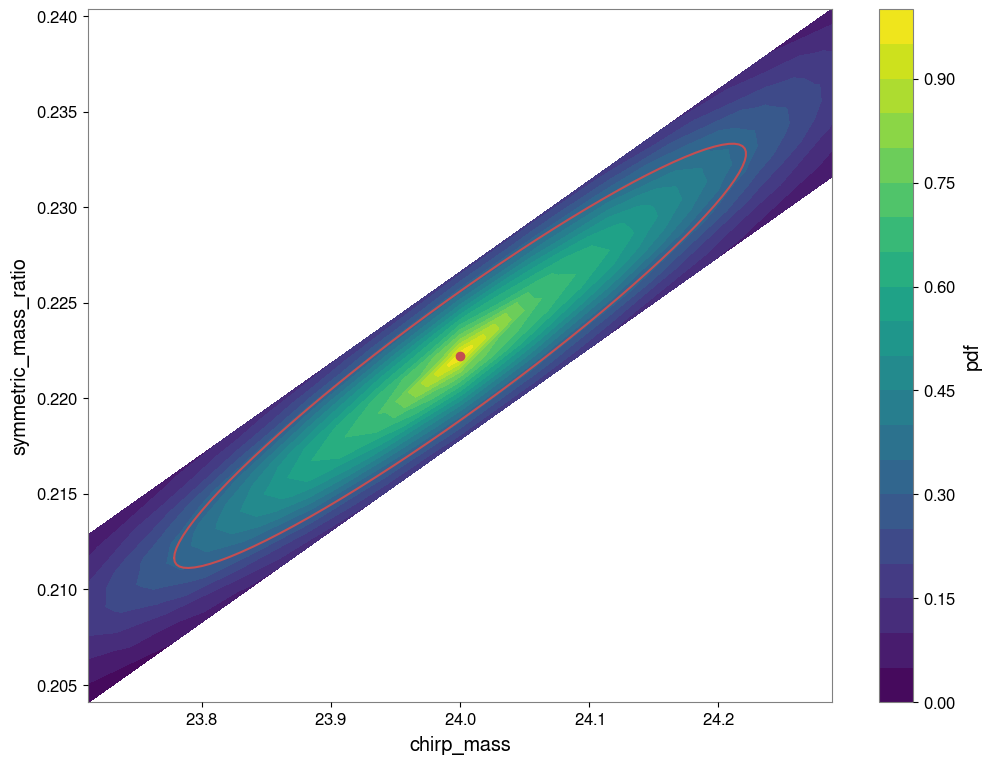

In [6]:
# Plots figure
plt.figure(figsize=(12, 9))
plt.tricontourf(chirp_eta_mat.samples[0], chirp_eta_mat.samples[1], chirp_eta_p, levels=np.linspace(0, 1, 21))
plt.xlabel(chirp_eta_mat.keys()[0])
plt.ylabel(chirp_eta_mat.keys()[1])
plt.colorbar(label='pdf')
plt.plot(chirp_eta_ellipse.samples[0], chirp_eta_ellipse.samples[1], 'r')
plt.scatter(24,2/9,c='r')
plt.grid()
plt.show()

Important values stored in the simple-pe Metric object:

| Name | Description |
| --- | --- |
| self.dxs | The eigenvectors of the penultimate metric with length scaled to a certain self.mismatch value. These are used as basis vectors for the final metric. |
| self.coordinate_metric | The final metric with self.dxs as a basis. |
| self.metric | The final metric transformed to physical parameter space. |
| self.evec | The eigenvectors of self.metric normalised to 1. |
| self.evals | The eigenvalues of self.metric. |
| self.normalized_evecs() | Returns a normalised self.evec to give the desired mismatch, calculated by multiplying by sqrt(self.mismatch/abs(self.evals)). |

The coordinate metric here is symmetric by construction, which means its eigenvectors are 'perpendicular' in dx space. A vector $x$ can be transformed between bases using

$$
x_\mathrm{new} = A x_\mathrm{old},
$$

where $A$ is a matrix whose columns are the old basis vector coordinates in the new basis.

We can therefore transform from vectors in dx units to physical units using self.dxs as our transformation matrix $A$.

The ellipse is defined as 

$$
x^T g x = C,
$$

where $x$ is a vector of the differences in each parameter from the centre of the ellipse, $g$ is the metric, and $C$ is a constant.

Let's transform this to a different basis:

$$
x^T g x = C = {x^\prime}^T g^\prime x,
$$

using

$$
x = Ax^\prime.
$$

Substituting this in, we have

$$
{x^\prime}^T A^T g A x^\prime = {x^\prime}^T g^\prime x^\prime,
$$

and so we can read off that

$$
g = {A^{-1}}^T g^\prime A^{-1}.
$$

This is (luckily) the same expression used by simple-pe to transform self.coordinate_metric to self.metric, which we can verify explicity:

In [7]:
dx_inv = np.linalg.inv(g_chirp_eta.dxs.samples)
transformed_coordinate_metric = np.matmul(dx_inv.T, np.matmul(g_chirp_eta.coordinate_metric, dx_inv))

print(transformed_coordinate_metric, 2*'\n', g_chirp_eta.metric)

[[  1.56647099 -29.75025025]
 [-29.75025025 622.65293176]] 

 [[  1.56647099 -29.75025025]
 [-29.75025025 622.65293176]]


This transformation preserves the symmetry of the metric, meaning that the eigenvectors (self.evec) are now perpendicular in physical space and are not (in general) in the same direction as the eigenvectors of the coordinate metric.

We can show this mathematically with

$$
g^\prime y^\prime = \lambda^\prime y^\prime,
$$

where $y^\prime$ and $\lambda^\prime$ are an eigenvector and corresponding eigenvalue of $g^\prime$.

If the eigenvectors were the same, we could write 

$$
g y = \lambda y,
$$

$$
{A^{-1}}^T g^\prime A^{-1} y = \lambda y,
$$

$$
{A^{-1}}^T g^\prime y^\prime = \lambda y,
$$

$$
\lambda^\prime {A^{-1}}^T y^\prime = \lambda y,
$$

$$
\lambda^\prime {A^{-1}}^T A^{-1} y = \lambda y.
$$

This last statement is only true if $A^T = A^{-1}$, i.e. if $A$ is an orthogonal matrix. This is only true if the transformation represented by $A$ is purely a rotation, i.e. no stretching/squeezing of the axes, which is not generally the case. Therefore the eigenvectors of $g$ must be different to those of $g^\prime$.

Let's again verify this explicitly by transforming the eigenvectors of the coordinate metric to physical space and comparing them to the eigenvectors of the physical metric.

In [8]:
coordinate_evec = np.linalg.eig(g_chirp_eta.coordinate_metric)[1]
transformed_coordinate_evec = np.matmul(g_chirp_eta.dxs.samples, coordinate_evec)
physical_evec = g_chirp_eta.normalized_evecs().samples

print(transformed_coordinate_evec, 2*'\n', physical_evec)

[[-0.16294645 -0.1485278 ]
 [-0.00542786 -0.00948727]] 

 [[-2.21379568e-01  1.61089472e-04]
 [-1.05799361e-02 -3.37071202e-03]]


In order to generate a set of points in the desired ellipse, simple-pe multiplies a set of points on a unit circle with a matrix whose columns are the eigenvectors of the metric (i.e. by the matrix returned by self.normalized_evecs()).

These eigenvectors are 'conjugate diameters' of the ellipse, defined as the tangents to the ellipses at the endpoints of each conjugate diameters being perpendicular. There are an infinite number of these conjugate diameter pairs around the ellipse. The ellipse given by the metric is the same in all bases, meaning that the eigenvectors in each basis correspond to a different (in general) pair (specifically the conjugate diameter pair that are perpendicular in the given basis).

Let's take a look at this visually, by plotting in both the dx coordinates and in physical coordinates.

Text(0, 0.5, 'symmetric mass ratio (eta)')

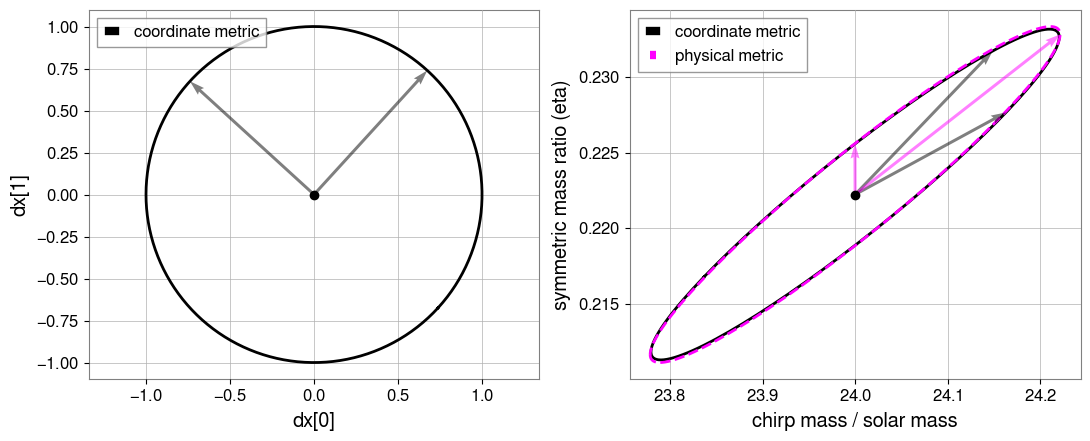

In [9]:
plt.figure(figsize=(12.8,4.8))

# First make subplot in coordinate space
plt.subplot(1,2,1)

# Find eigendirections of the coordinate metric and plot (enforced a favored sign)
plt.quiver(*[0,0],*-coordinate_evec[:,0], angles='xy', 
           scale_units='xy', scale=1, color='k', units='dots', width=3, alpha=0.5, zorder=4)
plt.quiver(*[0,0],*coordinate_evec[:,1], angles='xy', 
           scale_units='xy', scale=1, color='k', units='dots', width=3, alpha=0.5, zorder=4)
plt.scatter(*[0,0], c='k', zorder=4)

# Get points on a unit circle in coordinate space
angle = np.linspace(0, 2*np.pi, 150) 
radius = 1
x = radius * np.cos(angle) 
y = radius * np.sin(angle)
x = x.reshape(1,-1)
y = y.reshape(1,-1)
circle = np.concatenate((x,y), axis=0)

# Transform to ellipse and plot
coordinate_ellipse = np.matmul(coordinate_evec, circle)
plt.plot(coordinate_ellipse[0], coordinate_ellipse[1], c='k', lw=2, label='coordinate metric', zorder=3)

# Plot formatting
ax_size = plt.gca().get_window_extent().transformed(plt.gcf().dpi_scale_trans.inverted())
ax_ratio = ax_size.width/ax_size.height
xlims = plt.gca().get_xlim()
xlim_rad = 0.5*(xlims[1]-xlims[0])*ax_ratio
xlim_avg = 0.5*(xlims[1]+xlims[0])
plt.xlim(xlim_avg-xlim_rad, xlim_avg+xlim_rad)
plt.legend(loc='upper left')
plt.xlabel('dx[0]')
plt.ylabel('dx[1]')

# Now make subplot in physical space
plt.subplot(1,2,2)

# Find eigendirections of both metrics and plot (enforcing a favored sign)
physical_centre = np.array([pars['chirp_mass'], pars['symmetric_mass_ratio']])
plt.quiver(*physical_centre, *-transformed_coordinate_evec[:,0], angles='xy', 
           scale_units='xy', scale=1, color='k', units='dots', width=3, alpha=0.5, zorder=4)
plt.quiver(*physical_centre, *-transformed_coordinate_evec[:,1], angles='xy', 
           scale_units='xy', scale=1, color='k', units='dots', width=3, alpha=0.5, zorder=4)
plt.quiver(*physical_centre, *-physical_evec[:,0], angles='xy', 
           scale_units='xy', scale=1, color='magenta', units='dots', width=3, alpha=0.5, zorder=4)
plt.quiver(*physical_centre, *-physical_evec[:,1], angles='xy', 
           scale_units='xy', scale=1, color='magenta', units='dots', width=3, alpha=0.5, zorder=4)
plt.scatter(*physical_centre, c='k', zorder=4)

# Transform to ellipses and plot
transformed_coordinate_ellipse = np.matmul(g_chirp_eta.dxs.samples, coordinate_ellipse)
physical_ellipse = np.matmul(physical_evec, circle)
plt.plot(transformed_coordinate_ellipse[0]+physical_centre[0], transformed_coordinate_ellipse[1]+physical_centre[1], 
         c='k', lw=2, label='coordinate metric', zorder=3)
plt.plot(physical_ellipse[0]+physical_centre[0], physical_ellipse[1]+physical_centre[1], 
         c='magenta', lw=2, ls='dashed', label='physical metric', zorder=3.5)

# Plot formatting
plt.legend(loc='upper left')
plt.xlabel('chirp mass / solar mass')
plt.ylabel('symmetric mass ratio (eta)')

The ellipses are however not exactly identical as can be seen below.

Text(0, 0.5, 'symmetric mass ratio (eta)')

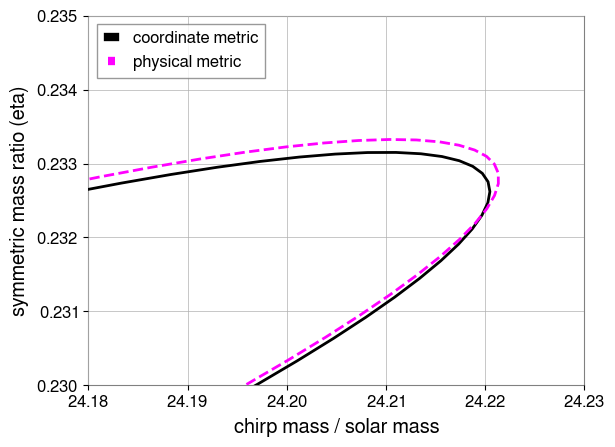

In [12]:
plt.plot(transformed_coordinate_ellipse[0]+physical_centre[0], transformed_coordinate_ellipse[1]+physical_centre[1], 
         c='k', lw=2, label='coordinate metric', zorder=3)
plt.plot(physical_ellipse[0]+physical_centre[0], physical_ellipse[1]+physical_centre[1], 
         c='magenta', lw=2, ls='dashed', label='physical metric', zorder=3.5)
plt.legend(loc='upper left')
plt.xlim(24.18,24.23)
plt.ylim(0.23,0.235)
plt.xlabel('chirp mass / solar mass')
plt.ylabel('symmetric mass ratio (eta)')

This is obvious when considering that the ellipse from the coordinate metric is generated by multiplying the ellipse in coordinate space (exactly a circle) by self.dxs, whereas the ellipse from the physical metric is from multiplying a circle by self.normalized_evecs(). As these are the eigenvectors of the penultimate and final metric respectively, they are different (however the difference is minimal due to this last metric change being forced to be below a certain tolerance).

Not completely sure why this is, but best guess is due to a numerical issue. After all, with an infinite number of iterations both ellipses would be the same, as the penultimate and final metric would indeed be identical.

# Implementing harmonics into simple-pe

In [13]:
from simple_pe.waveforms import eccentric

In [17]:
hps, hcs = eccentric.calculate_eccentric_harmonics(60, 2, 0.1, 0, 0, 10, 4096, n_ecc_harms=4)
ecc_h0 = hps[0].to_timeseries() - 1j*hcs[0].to_timeseries()
ecc_h1 = hps[1].to_timeseries() - 1j*hcs[1].to_timeseries()

In [18]:
import calcwf
all_wfs = calcwf.get_h([1]*6, 10, 0.1, 60, 2, 4096)
calc_h0 = all_wfs[1]
calc_h1 = all_wfs[2]

(-1.5e-19, 1.5e-19)

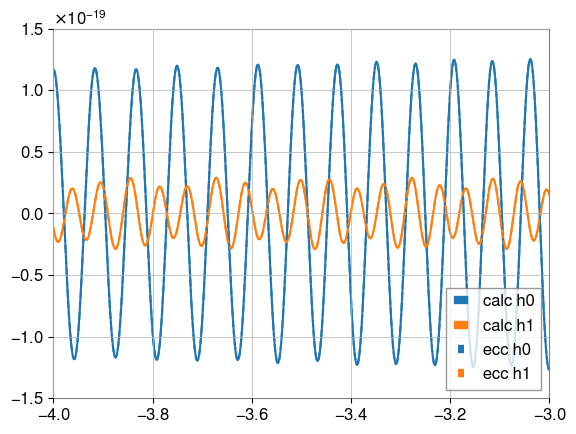

In [25]:
plt.plot(calc_h0.sample_times, calc_h0, c='C0', label='calc h0')
plt.plot(calc_h1.sample_times, calc_h1, c='C1', label='calc h1')
plt.plot(ecc_h0.sample_times, ecc_h0, c='C0', ls='dashed', label='ecc h0')
plt.plot(ecc_h1.sample_times, ecc_h1, c='C1', ls='dashed', label='ecc h1')
plt.legend()
plt.xlim(-4,-3)
plt.ylim(-1.5e-19, 1.5e-19)

In [20]:
from pycbc.filter import match

In [21]:
psd = calcwf.gen_psd(calc_h0, 10)
match(calc_h0.real(), ecc_h0.real(), psd, low_frequency_cutoff=10)

(0.9991092182080585, 0)

In [22]:
match(calc_h1.real(), ecc_h1.real(), psd, low_frequency_cutoff=10)

(0.9968701304527133, 0)